In [181]:
import pandas as pd
import matplotlib.pyplot as plt

In [206]:
data = pd.read_csv('influx.data.csv', skiprows=3)
data = data[data.columns[2:]]
data._start = pd.to_datetime(data._start).apply(lambda x: x.tz_convert('America/Fortaleza'))
data._stop = pd.to_datetime(data._stop).apply(lambda x: x.tz_convert('America/Fortaleza'))
data._time = pd.to_datetime(data._time).apply(lambda x: x.tz_convert('America/Fortaleza'))

bt_to_mb = lambda x: x/1024/1024

data._value = data._value.apply(bt_to_mb)
data.head(3)

,table,_start,_stop,_time,_value,_field,_measurement,host,instance,job,user
0,0,2023-10-27 17:00:00.341000-03:00,2023-10-27 18:00:00.341000-03:00,2023-10-27 17:13:43.403000-03:00,71.296875,node_memory_Buffers_bytes,prometheus_remote_write,b72f245628d6,PROXMOX,node_exporter,ivan
1,0,2023-10-27 17:00:00.341000-03:00,2023-10-27 18:00:00.341000-03:00,2023-10-27 17:13:48.403000-03:00,71.296875,node_memory_Buffers_bytes,prometheus_remote_write,b72f245628d6,PROXMOX,node_exporter,ivan
2,0,2023-10-27 17:00:00.341000-03:00,2023-10-27 18:00:00.341000-03:00,2023-10-27 17:13:53.403000-03:00,71.304688,node_memory_Buffers_bytes,prometheus_remote_write,b72f245628d6,PROXMOX,node_exporter,ivan


In [207]:
for ii in data.columns[5:]:
    print(data[ii].unique())

['node_memory_Buffers_bytes' 'node_memory_Cached_bytes'
 'node_memory_MemFree_bytes' 'node_memory_MemTotal_bytes'
 'node_memory_SReclaimable_bytes']
['prometheus_remote_write']
['b72f245628d6']
['PROXMOX']
['node_exporter']
['ivan']


In [238]:
total_ram_mask = data._field == 'node_memory_MemTotal_bytes'
free_mem_mask = data._field == 'node_memory_MemFree_bytes'
cached_mask = data._field == 'node_memory_Cached_bytes'
buffers_mask = data._field == 'node_memory_Buffers_bytes'
sre_mask = data._field == 'node_memory_SReclaimable_bytes'


df_memory = pd.DataFrame(columns=['total_ram', 'free_mem', 'cached', 'buffers', 'sre',])
df_memory.total_ram = data._value[total_ram_mask].reset_index(drop=True)
df_memory.free_mem = data._value[free_mem_mask].reset_index(drop=True)
df_memory.cached = data._value[cached_mask].reset_index(drop=True)
df_memory.buffers = data._value[buffers_mask].reset_index(drop=True)
df_memory.sre = data._value[sre_mask].reset_index(drop=True)

display(df_memory.head(3))



,total_ram,free_mem,cached,buffers,sre
0,32044.878906,28286.050781,1824.753906,71.296875,79.011719
1,32044.878906,28285.558594,1824.753906,71.296875,79.011719
2,32044.878906,28283.234375,1824.757812,71.304688,79.011719


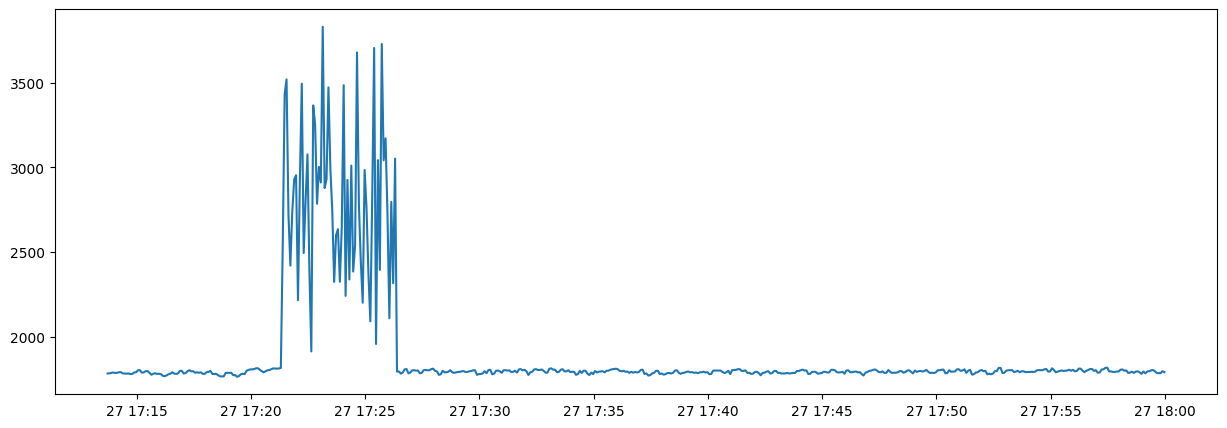

In [242]:


fig, ax = plt.subplots(figsize=(15, 5))
time = data.loc[total_ram_mask, '_time']

# ax.plot(time, df_memory.total_ram, label='MemTotal')
# ax.plot(time, df_memory.free_mem, label='MemFree')

used_ram = df_memory.total_ram - df_memory.free_mem - df_memory.cached - df_memory.buffers - df_memory.sre

ax.plot(time, used_ram, label='Used')


plt.show()


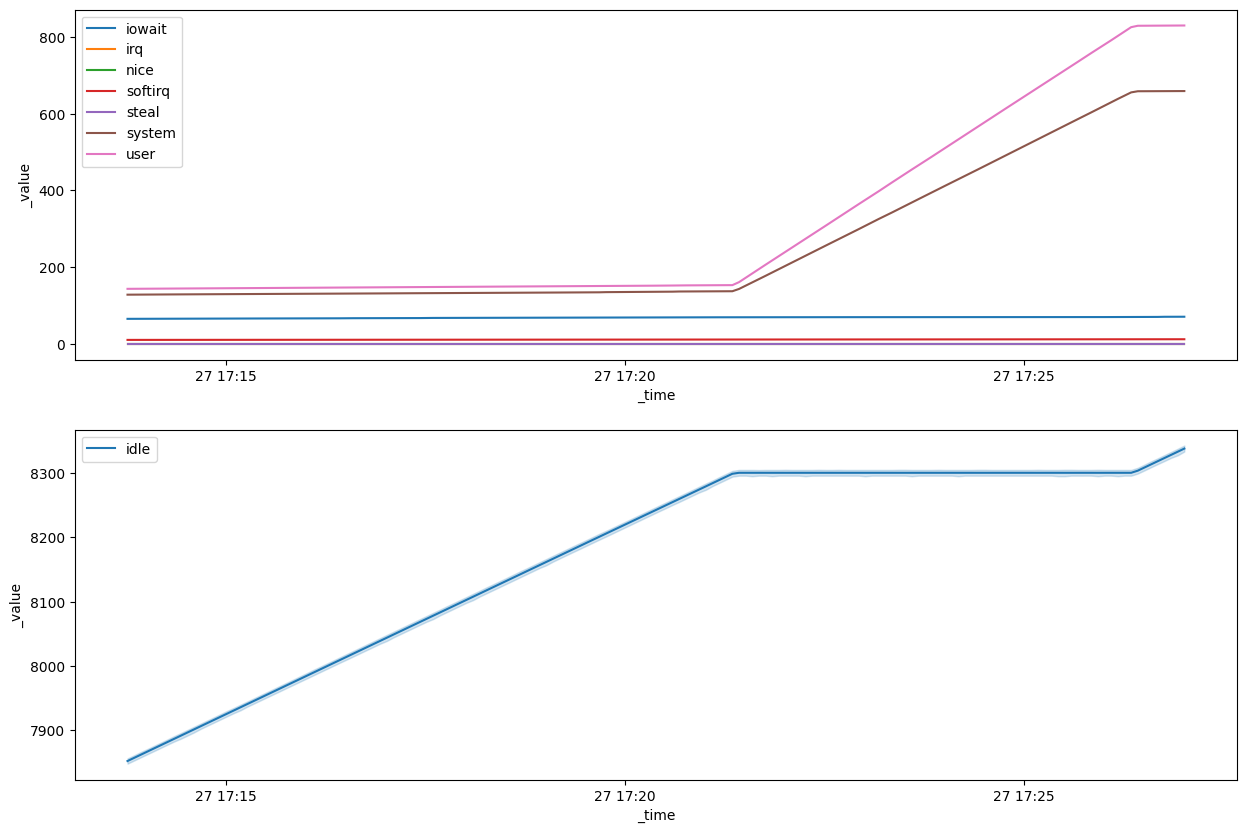

In [154]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(15, 10))
for ii in nidle_df['mode'].unique():
    mask = nidle_df['mode'] == ii
    sns.lineplot(x='_time', y='_value', data=nidle_df[mask], ax=ax[0], label=ii)

sns.lineplot(x='_time', y='_value', data=idle_df, ax=ax[1], label='idle')
plt.show()    

In [136]:
instantaneous_frequency

array([0.00246914])

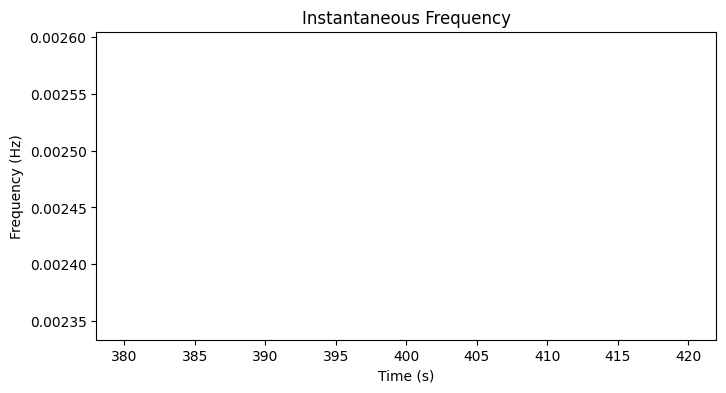

In [125]:
# Plot the instantaneous frequency
plt.figure(figsize=(8, 4))
plt.plot(times, instantaneous_frequency)
plt.title('Instantaneous Frequency')
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.show()